此colab 使用API(kaggle datasets download -d valentynsichkar/traffic-signs-dataset-in-yolo-format)資料庫
已下載好 因此掛接GD




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

# Removing the dataset and cloned yolo files if they exist already

In [3]:
try:
    shutil.rmtree("/kaggle/working/dataset")
    shutil.rmtree("/kaggle/working/yolov5")
except:
    pass

# Cloning YoloV5

>



In [4]:
!git config --global --unset https.proxy

In [5]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.60 MiB | 20.71 MiB/s, done.
Resolving deltas: 100% (10988/10988), done.


In [6]:
%cd yolov5/

/content/yolov5


# Installing YoloV5 requirements files

In [7]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.7/641.7 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


# Preparing the traffic signs dataset for training and validation

In [8]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/kaggle/working/dataset/images/train"
val_path = "/kaggle/working/dataset/images/val"
crs_path = "/content/drive/MyDrive/traffic-signs-dataset-in-yolo-format/ts/ts"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  592
validation images are :  148


In [10]:
len(imgs)

741

In [9]:
train_image_path = "/kaggle/working/dataset/images/train"
train_label_path = "/kaggle/working/dataset/labels/train"
val_image_path = "/kaggle/working/dataset/images/val"
val_label_path = "/kaggle/working/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['00374.jpg'] ['00374.txt']


# Downloading dataset.yaml file from google cloud for the dataset

In [10]:
!pip install googledrivedownloader

In [11]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1KtlDXpLCfqoklUTdrnVASNbxL_AK9qnx',
                                    dest_path='/content/dataset/dataset.yaml')

In [12]:
with open(r'/content/dataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /kaggle/working/dataset/images/train\n', 'val: /kaggle/working/dataset/images/val\n', '\n', 'nc: 4\n', "names: ['speed limit','yield','mandatory','other']"]


# Training the YoloV5 model on custom traffic signs dataset

In [19]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 20 --data /content/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
train: weights=yolov5s.pt, cfg=, data=/content/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

# Making Predictions on Validation data

In [17]:
!python detect.py --source /content/test.jpg --data /content/dataset/dataset.yaml --weights runs/train/exp/weights/best.pt --iou-thres 0.45 --conf-thres 0.2

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/test.jpg, data=/content/dataset/dataset.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test.jpg: 224x640 1 yield, 1 mandatory, 42.4ms
Speed: 0.3ms pre-process, 42.4ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [14]:
import matplotlib.pyplot as plt
from PIL import Image

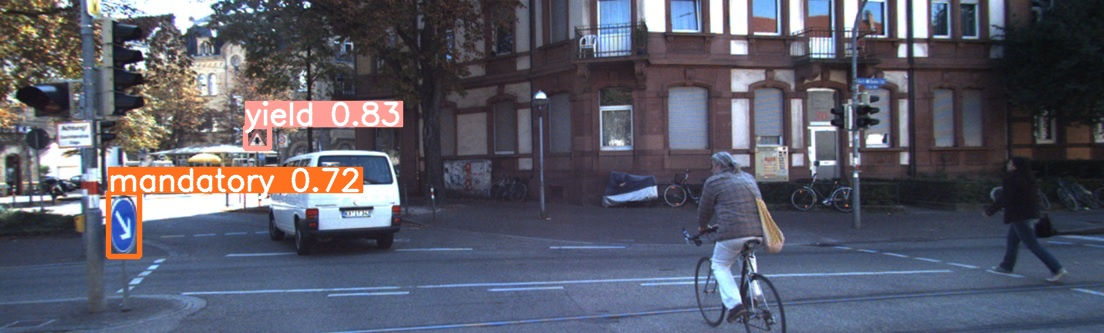

In [18]:
Image.open('/content/yolov5/runs/detect/exp3/test.jpg')